# WEB SCRAPING – ASSIGNMENT 4

In [1]:
#importing required libraries:

import numpy as np
import pandas as pd
from selenium import webdriver

from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException

import time
import warnings
warnings.filterwarnings('ignore')

## 1. Scrape the details of most viewed videos on YouTube from Wikipedia.
### Url = https://en.wikipedia.org/wiki/List_of_most-viewed_YouTube_videos
You need to find following details:
A) Rank
B) Name
C) Artist
D) Upload date
E) Views

In [2]:
# connecting to the driver:
driver = webdriver.Chrome("chromedriver.exe")
driver.maximize_window()

In [3]:
# getting to webpage:
url = 'https://en.wikipedia.org/wiki/List_of_most-viewed_YouTube_videos'
driver.get(url)

In [4]:
# Creating Empty lists
Name = []
Artist = []
Upload = []
Views = []

# Scraping Names 
try:
    N= driver.find_elements_by_xpath('/html/body/div[3]/div[3]/div[5]/div[1]/table[3]/tbody/tr/td[2]')
    for i in N:
        Name.append(i.text[1:-4].replace('"',''))
except NoSuchElementException:
    Name.append("")
    
# Scraping Artist
try:
    A = driver.find_elements_by_xpath('/html/body/div[3]/div[3]/div[5]/div[1]/table[3]/tbody/tr/td[3]')
    for i in A:
        Artist.append(i.text)
except NoSuchElementException:
    Artist.append("")
    
# Scraping views
try:
    V = driver.find_elements_by_xpath('/html/body/div[3]/div[3]/div[5]/div[1]/table[3]/tbody/tr/td[4]')
    for i in V:
        Views.append(i.text)
except NoSuchElementException:
    Views.append("")
    
# Scraping Upload
try:
    Up = driver.find_elements_by_xpath('/html/body/div[3]/div[3]/div[5]/div[1]/table[3]/tbody/tr/td[5]')
    for i in Up:
        Upload.append(i.text)
except NoSuchElementException:
    Upload.append("")
    
# Rank
R = list(range(1,len(Name)+1))

In [6]:
# Creating Data Frame 
df = pd.DataFrame({'Rank':R,
                  'Name':Name,
                   'Artist':Artist,
                   'Upload Date':Upload,
                   'Views in billion':Views})
df1 = df.set_index('Rank')
df1

,Name,Artist,Upload Date,Views in billion
Rank,,,,
1,Baby Shark Dance,Pinkfong Baby Shark - Kids' Songs & Stories,"June 17, 2016",10.23
2,Despacito,Luis Fonsi,"January 12, 2017",7.75
3,Johny Johny Yes Papa,LooLoo Kids,"October 8, 2016",6.18
4,Shape of You,Ed Sheeran,"January 30, 2017",5.62
5,See You Again,Wiz Khalifa,"April 6, 2015",5.42
6,Bath Song,Cocomelon – Nursery Rhymes,"May 2, 2018",5.01
7,Learning Colors – Colorful Eggs on a Farm,Miroshka TV,"February 27, 2018",4.56
8,Masha and the Bear – Recipe for Disaster,Get Movies,"January 31, 2012",4.48
9,Phonics Song with Two Words,ChuChu TV,"March 6, 2014",4.48


## 2. Scrape the details team India’s international fixtures from bcci.tv.
### Url = https://www.bcci.tv/.
You need to find following details:
A) Match title (I.e. 1st ODI)
B) Series
C) Place
D) Date
E) Time


Note: - From bcci.tv home page you have reach to the international fixture page through code.

In [14]:
# connecting to the driver:
driver = webdriver.Chrome("chromedriver.exe")
driver.maximize_window()

In [15]:
# getting to webpage:
url = 'https://www.bcci.tv/'
driver.get(url)

In [18]:
# getting all information page by clicking on view all

next_ = driver.find_element_by_class_name('moreMatchesLink')
next_.click()

more_fixture = driver.find_element_by_xpath('/html/body/div[3]/div[2]/div/div/div/div[2]/div[3]/div[2]/div/button')
more_fixture.click()

In [96]:
# Creating Empty list:
title = []
Series = []
Place = []
Date = []
Time = []

# Sraping required information:

# Scrapping Match title:
try:
    T = driver.find_elements_by_xpath('/html/body/div[3]/div[2]/div/div/div/div[2]/div/div/div/div/div[4]/div/span[1]')
    for i in T:
        if i.text.endswith("-"):
            title.append(i.text.replace(" -",""))
        else:
                title.append("")
except NoSuchElementException:
    title.append('')
    

# Scraping Series:
try:
    S = driver.find_elements_by_xpath('//span[@class="ng-binding"]')
    for i in S:
        Series.append(i.text)
except NoSuchElementException:
    Series.append('')


# Scrapping Place:
try:
    P = driver.find_elements_by_xpath('/html/body/div[3]/div[2]/div/div/div/div[2]/div[3]/div/div/div/div[4]/div')
    for i in P:
        if "-" in i.text:
            Place.append(i.text[11:])
        else:
            Place.append(i.text)
except NoSuchElementException:
    Place.append('')

    
# Scraping Date
try:
    D = driver.find_elements_by_xpath('//h5[@class="ng-binding"]')
    for i in D:
        Date.append(i.text)
except NoSuchElementException:
    Date.append('')


# Scraping Date
try:
    Tm = driver.find_elements_by_xpath('//h5[@class="text-right ng-binding"]')
    for i in Tm:
        Time.append(i.text)
except NoSuchElementException:
    Time.append('')


print(len(Series),len(title),len(Place),len(Date),len(Time))

16 16 16 16 16


In [97]:
# Creating DataFrame
df = pd.DataFrame({'Match title':title,
                   'Series':Series,
                   'Place':Place,
                   'Date':Date,
                   'Time':Time})
df

,Match title,Series,Place,Date,Time
0,2nd T20I,SRI LANKA TOUR OF INDIA T20 SERIES 2022,"Himachal Pradesh Cricket Association Stadium, ...",26 FEB 2022,7:00 PM IST
1,3rd T20I,SRI LANKA TOUR OF INDIA T20 SERIES 2022,"Himachal Pradesh Cricket Association Stadium, ...",27 FEB 2022,7:00 PM IST
2,1st Test,SRI LANKA TOUR OF INDIA TEST SERIES 2022,"Punjab Cricket Association IS Bindra Stadium, ...",4 MAR 2022,9:30 AM IST
3,,ICC WOMENS WORLD CUP 2022,"Bay Oval, Mount Maunganui",6 MAR 2022,6:30 AM IST
4,,ICC WOMENS WORLD CUP 2022,"Seddon Park, Hamilton",10 MAR 2022,6:30 AM IST
5,2nd Test,SRI LANKA TOUR OF INDIA TEST SERIES 2022,"M Chinnaswamy Stadium, Bengaluru",12 MAR 2022,12:30 PM IST
6,,ICC WOMENS WORLD CUP 2022,"Seddon Park, Hamilton",12 MAR 2022,6:30 AM IST
7,,ICC WOMENS WORLD CUP 2022,"Bay Oval, Mount Maunganui",16 MAR 2022,6:30 AM IST
8,,ICC WOMENS WORLD CUP 2022,"Eden Park, Auckland",19 MAR 2022,6:30 AM IST
9,,ICC WOMENS WORLD CUP 2022,"Seddon Park, Hamilton",22 MAR 2022,6:30 AM IST


## 3. Scrape the details of selenium exception from guru99.com.
### Url = https://www.guru99.com/
You need to find following details:
A) Name
B) Description


Note: - From guru99 home page you have to reach to selenium exception handling page through code.

In [100]:
# connecting to the driver:
driver = webdriver.Chrome("chromedriver.exe")
driver.maximize_window()

In [101]:
# getting to webpage:
url = 'https://www.guru99.com/'
driver.get(url)

In [102]:
# reaching to selenium exception handling page:
slnm = driver.find_element_by_xpath('/html/body/div[1]/div/div/div/main/div/article/div/div[1]/div[2]/div[1]/div/ul[1]/li[3]/a')
slnm.click()

Excp = driver.find_element_by_xpath('/html/body/div[1]/div/div/div/main/div/article/div/div/table[5]/tbody/tr[34]/td[1]/a')
Excp.click()

In [107]:
# Creating Empty list:
Name = []
Desc = []

# Sraping required information:

# Scraping Name
try:
    N = driver.find_elements_by_xpath('/html/body/div[1]/div/div/div/main/div/article/div/div/table/tbody/tr/td[1]')
    for i in N:
        Name.append(i.text)
except NoSuchElementException:
    Name.append('')

    
# Scraping Name
try:
    D = driver.find_elements_by_xpath('/html/body/div[1]/div/div/div/main/div/article/div/div/table/tbody/tr/td[2]')
    for i in D:
        Desc.append(i.text)
except NoSuchElementException:
    Desc.append('')
    
print(len(Name),len(Desc))

41 41


In [108]:
# Creating DataFrame
df = pd.DataFrame({'Exception name': Name, 'Description': Desc})
df

,Exception name,Description
0,ElementNotVisibleException,This type of Selenium exception occurs when an...
1,ElementNotSelectableException,This Selenium exception occurs when an element...
2,NoSuchElementException,This Exception occurs if an element could not ...
3,NoSuchFrameException,This Exception occurs if the frame target to b...
4,NoAlertPresentException,This Exception occurs when you switch to no pr...
5,NoSuchWindowException,This Exception occurs if the window target to ...
6,StaleElementReferenceException,This Selenium exception occurs happens when th...
7,SessionNotFoundException,The WebDriver is acting after you quit the bro...
8,TimeoutException,Thrown when there is not enough time for a com...
9,WebDriverException,This Exception takes place when the WebDriver ...


In [109]:
df.to_csv('selenium exceptions')

## 4. Scrape the details of State-wise GDP of India from statisticstime.com.
### Url = http://statisticstimes.com/
You have to find following details:
A) Rank
B) State
C) GSDP
D) GSDP
E) Share
F) GDP($ billion)


Note: - From statisticstimes home page you have to reach to economy page through code.

In [110]:
# connecting to the driver:
driver = webdriver.Chrome("chromedriver.exe")
driver.maximize_window()

In [111]:
# getting to webpage:
url = 'http://statisticstimes.com/'
driver.get(url)

In [115]:
# reaching to Economy(India) page:
Economy = driver.find_element_by_xpath('/html/body/div[2]/div[1]/div[2]/div[2]/button/i')
Economy.click()

India = driver.find_element_by_xpath('/html/body/div[2]/div[1]/div[2]/div[2]/div/a[3]')
India.click()

# reaching to State-wise GDP of India:
State_GDP = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[2]/ul/li[1]/a')
State_GDP.click()

In [131]:
# Creating Empty list:
Rank = []
State = []
GSDP_19_20 = []
GSDP_18_19 = []
Share = []
GDP = []

# Sraping required information:

# Scraping Rank
try:
    R = driver.find_elements_by_xpath('/html/body/div[3]/div[2]/div[5]/div[1]/div/table/tbody/tr/td[1]')
    for i in R:
        Rank.append(i.text)
except NoSuchElementException:
    Rank.append('')

# Scraping State
try:
    S = driver.find_elements_by_xpath('/html/body/div[3]/div[2]/div[5]/div[1]/div/table/tbody/tr/td[2]')
    for i in S:
        State.append(i.text)
except NoSuchElementException:
    State.append('')
    
# Scraping GSDP for year (2019-2020)
try:
    GSDP1 = driver.find_elements_by_xpath('/html/body/div[3]/div[2]/div[5]/div[1]/div/table/tbody/tr/td[3]')
    for i in GSDP1:
        GSDP_19_20.append(i.text)
except NoSuchElementException:
    GSDP_19_20.append('')

# Scrapping GSDP for year (2018-2019)
try:
    GSDP2 = driver.find_elements_by_xpath('/html/body/div[3]/div[2]/div[5]/div[1]/div/table/tbody/tr/td[4]')
    for i in GSDP2:
        GSDP_18_19.append(i.text)
except NoSuchElementException:
    GSDP_18_19.append('')
    
# Scraping Share
try:
    Sh = driver.find_elements_by_xpath('/html/body/div[3]/div[2]/div[5]/div[1]/div/table/tbody/tr/td[5]')
    for i in Sh:
        Share.append(i.text)
except NoSuchElementException:
    Share.append('')
    
# Scraping GDP
try:
    G = driver.find_elements_by_xpath('/html/body/div[3]/div[2]/div[5]/div[1]/div/table/tbody/tr/td[6]')
    for i in G:
        GDP.append(i.text)
except NoSuchElementException:
    GDP.append('')

print(len(Rank),len(State),len(GSDP_19_20),len(GSDP_18_19),len(Share),len(GDP))

33 33 33 33 33 33


In [134]:
# Creating DataFrame
df = pd.DataFrame({'Rank':Rank,
                   'State':State,
                   'GSDP for year(2019-2020)':GSDP_19_20,
                   'GSDP for year(2018-2019)':GSDP_18_19,
                   'Shere':Share,
                   'GDP': GDP})
df1 = df.set_index('Rank')
df1

,State,GSDP for year(2019-2020),GSDP for year(2018-2019),Shere,GDP
Rank,,,,,
1,Maharashtra,-,"2,632,792",13.94%,399.921
2,Tamil Nadu,"1,845,853","1,630,208",8.63%,247.629
3,Uttar Pradesh,"1,687,818","1,584,764",8.39%,240.726
4,Gujarat,-,"1,502,899",7.96%,228.290
5,Karnataka,"1,631,977","1,493,127",7.91%,226.806
6,West Bengal,"1,253,832","1,089,898",5.77%,165.556
7,Rajasthan,"1,020,989","942,586",4.99%,143.179
8,Andhra Pradesh,"972,782","862,957",4.57%,131.083
9,Telangana,"969,604","861,031",4.56%,130.791


## 5. Scrape the details of trending repositories on Github.com.
### Url = https://github.com/
You have to find the following details:
A) Repository title
B) Repository description
C) Contributors count
D) Language used


Note: - From the home page you have to click on the trending option from Explore menu through code.

In [48]:
# connecting to the driver:
driver = webdriver.Chrome("chromedriver.exe")
driver.maximize_window()

In [49]:
# getting to webpage:
url = 'https://github.com/'
driver.get(url)

In [50]:
# clicking on Explore and then Trending:

explore = driver.find_element_by_xpath('/html/body/div[1]/header/div/div[2]/nav/ul/li[4]/details/summary')
explore.click()

Trending = driver.find_element_by_xpath('/html/body/div[1]/header/div/div[2]/nav/ul/li[4]/details/div/ul/li[5]/a')
Trending.click()

In [61]:
# # Creating Empty list:
title = []
description = []
Contributors = []
Language = []
links = []
lang = []
# Sraping required information:

# Scraping title
try:
    T = driver.find_elements_by_xpath('/html/body/div[4]/main/div[3]/div/div[2]/article/h1')
    for i in T:
        title.append(i.text)
except NoSuchElementException:
    title.append('')

# Scraping description
try:
    D = driver.find_elements_by_xpath('/html/body/div[4]/main/div[3]/div/div[2]/article/p')
    for i in D:
        description.append(i.text)
except NoSuchElementException:
    description.append('')

#scraping contributor details
try:
    C = driver.find_elements_by_xpath('//span[@class="d-inline-block mr-3"]')
    for i in C:
        Contributors.append(len(i.find_elements_by_tag_name('a')))
         
except:
    Contributors.append('-')    
    
#getting into each links and storing into link list.
tags = driver.find_elements_by_xpath('//h1[@class="h3 lh-condensed"]/a')
for i in tags:
    links.append(i.get_attribute('href'))

for j in links:
    driver.get(j)
      
    #scraping languages used in each repository 
    try:
        tag = driver.find_elements_by_xpath('//span[@class="color-fg-default text-bold mr-1"]')
        for i in tag:
            lang.append(i.text)
        Language.append(lang)   
    except NoSuchElementException:
        Language.append(' ')
        
print(len(title),len(description),len(Contributors),len(Language))

25 25 25 25


In [63]:
# Creating DataFrame
df = pd.DataFrame({'Repository title':title,
                   'Repository description':description,
                   'Contributors count':Contributors,
                   'Language used':Language})
df

,Repository title,Repository description,Contributors count,Language used
0,AppFlowy-IO / AppFlowy,AppFlowy is an open-source alternative to Noti...,5,"[Rust, Dart, C++, CMake, Ruby, Swift, Other, C..."
1,cat-milk / Anime-Girls-Holding-Programming-Books,Anime Girls Holding Programming Books,5,"[Rust, Dart, C++, CMake, Ruby, Swift, Other, C..."
2,dj-nitehawk / FastEndpoints,A light-weight REST Api framework for ASP.Net ...,4,"[Rust, Dart, C++, CMake, Ruby, Swift, Other, C..."
3,Azure / AlwaysOn,AlwaysOn provides a design methodology and app...,5,"[Rust, Dart, C++, CMake, Ruby, Swift, Other, C..."
4,krol3 / container-security-checklist,Checklist for container security - devsecops p...,2,"[Rust, Dart, C++, CMake, Ruby, Swift, Other, C..."
5,planetscale / beam,A simple message board for your organization o...,5,"[Rust, Dart, C++, CMake, Ruby, Swift, Other, C..."
6,louisyoungx / JD-SHOPPER,"京东自动下单 (自动登录,指定时间预约商品,商品补货监控,自动加购物车,自动下单)",4,"[Rust, Dart, C++, CMake, Ruby, Swift, Other, C..."
7,nusr / hacker-laws-zh,"💻📖对开发人员有用的定律、理论、原则和模式。(Laws, Theories, Princip...",5,"[Rust, Dart, C++, CMake, Ruby, Swift, Other, C..."
8,phil-opp / blog_os,Writing an OS in Rust,5,"[Rust, Dart, C++, CMake, Ruby, Swift, Other, C..."
9,labuladong / fucking-algorithm,刷算法全靠套路，认准 labuladong 就够了！English version supp...,5,"[Rust, Dart, C++, CMake, Ruby, Swift, Other, C..."


## 6. Scrape the details of top 100 songs on billiboard.com.
### Url = https:/www.billboard.com/
You have to find the following details:
A) Song name
B) Artist name
C) Last week rank
D) Peak rank
E) Weeks on board


Note: - From the home page you have to click on the charts option then hot 100-page link through code.

In [67]:
# connecting to the driver:
driver = webdriver.Chrome("chromedriver.exe")
driver.maximize_window()

In [68]:
# getting to webpage:
url = 'https:/www.billboard.com/'
driver.get(url)

In [69]:
# clicking on charts and then hot100:

charts = driver.find_element_by_xpath('/html/body/div[4]/header/div[1]/div/div/div[2]/div/nav/ul/li[1]/a')
charts.click()

hot100 = driver.find_element_by_xpath('/html/body/div[4]/header/div[2]/div/nav/ul/li[1]/a')
hot100.click()

In [90]:
# Creating Empty list:

Song_name = []
Artist_name = []
Last_week_rank = []
Peak_rank =[]
Weeks_on_board = []

# Sraping required information:

# Scraping Song_name
try:
    SN = driver.find_elements_by_xpath('/html/body/div[4]/main/div[2]/div[3]/div/div/div/div[2]/div/ul/li[4]/ul/li[1]/h3')
    for i in SN:
        Song_name.append(i.text)
except NoSuchElementException:
    Song_name.append('')


# Scraping Artist_name
try:
    AN = driver.find_elements_by_xpath('/html/body/div[4]/main/div[2]/div[3]/div/div/div/div[2]/div/ul/li[4]/ul/li[1]/span')
    for i in AN:
        Artist_name.append(i.text)
except NoSuchElementException:
    Artist_name.append('')


# Scraping Last_week_rank
try:
    LVR = driver.find_elements_by_xpath('/html/body/div[4]/main/div[2]/div[3]/div/div/div/div[2]/div/ul/li[4]/ul/li[4]/span')
    for i in LVR:
        Last_week_rank.append(i.text)
except NoSuchElementException:
    Last_week_rank.append('')
    

# Scraping Peak_rank
try:
    Peak = driver.find_elements_by_xpath('/html/body/div[4]/main/div[2]/div[3]/div/div/div/div[2]/div/ul/li[4]/ul/li[5]/span')
    for i in Peak:
        Peak_rank.append(i.text)
except NoSuchElementException:
    Peak_rank.append('')

    
# Scraping Weeks_on_board
try:
    W = driver.find_elements_by_xpath('/html/body/div[4]/main/div[2]/div[3]/div/div/div/div[2]/div/ul/li[4]/ul/li[6]/span')
    for i in W:
        Weeks_on_board.append(i.text)
except NoSuchElementException:
    Weeks_on_board.append('')    

    
print(len(Song_name),len(Artist_name),len(Last_week_rank),len(Peak_rank),len(Weeks_on_board))

100 100 100 100 100


In [96]:
#converting into dataframe
df = pd.DataFrame({'Song Name':Song_name,
                   'Artist Name':Artist_name,
                   'Last Week Rank':Last_week_rank,
                   'Peak Rank':Peak_rank,
                   'Weeks on Board':Weeks_on_board,
                  'This week rank':list(range(1,101)) })

df = df.set_index("This week rank")
df

,Song Name,Artist Name,Last Week Rank,Peak Rank,Weeks on Board
This week rank,,,,,
1,We Don't Talk About Bruno,"Carolina Gaitan, Mauro Castillo, Adassa, Rhenz...",1,1,8
2,Heat Waves,Glass Animals,4,2,57
3,Easy On Me,Adele,3,1,19
4,abcdefu,GAYLE,7,4,13
5,Stay,The Kid LAROI & Justin Bieber,5,1,32
...,...,...,...,...,...
96,All Too Well (Taylor's Version),Taylor Swift,84,1,14
97,Come Back As A Country Boy,Blake Shelton,89,85,5
98,Iffy,Chris Brown,96,71,5


## 7. Scrape the details of Data science recruiters from naukri.com.
### Url = https://www.naukri.com/
You have to find the following details:
A) Name
B) Designation
C) Company
D) Skills they hire for
E) Location


Note: - From naukri.com homepage click on the recruiters option and the on the search pane type Data science and
click on search. All this should be done through code

In [6]:
# connecting to the driver:
driver = webdriver.Chrome("chromedriver.exe")
driver.maximize_window()

In [7]:
# getting to webpage:
url = 'https://www.naukri.com/recruiters'
driver.get(url)

In [8]:
#Searching for datascientist
tag = driver.find_element_by_xpath('//input[@class="sugInp"]')
tag.send_keys('Data Science')

#clicking search button
btn = driver.find_element_by_xpath('//button[@class="fl qsbSrch blueBtn"]')
btn.click()

In [10]:
#empty lists
Name=[]
Designation=[]
Company=[]
Skills=[]
Location=[]

#extracting all the details as per the requirement

# Name:
try:
    N = driver.find_elements_by_xpath('/html/body/div[3]/div/div[2]/div/div[2]/div/div/div[1]/div[1]/p/a[1]/span')
    for name in N:
        Name.append(name.text)
except NoSuchElementException: 
    Name.append(' ')

# Designation
try:
    Des = driver.find_elements_by_xpath('/html/body/div[3]/div/div[2]/div/div[2]/div/div/div[1]/div[1]/p/span[1]')
    for i in Des:
        Designation.append(i.text)
except NoSuchElementException:
    Designation.append(' ')

# Company
try:
    C = driver.find_elements_by_xpath('/html/body/div[3]/div/div[2]/div/div[2]/div/div/div[1]/div[1]/p/a[2]')
    for i in C:
        Company.append(i.text)
except NoSuchElementException:
    Company.append(' ')
    
# Skills
try:
    S = driver.find_elements_by_xpath('/html/body/div[3]/div/div[2]/div/div[2]/div/div/div[1]/div[2]')
    for i in S:
        Skills.append(i.text)
except NoSuchElementException:
    Skills.append(" ")
            
# Location
try:
    Loc = driver.find_elements_by_xpath('//p[@class="highlightable"]/span[2]')
    for i in Loc:
        Location.append(i.text)
except NoSuchElementException:
    Location.append(' ')
        
#length of all items
len(Name), len(Designation), len(Company), len(Skills), len(Location)

(50, 50, 50, 50, 48)

In [11]:
#converting scraped data into dataframe
df  = pd.DataFrame({'Name':Name[0:48],
                    'Designation':Designation[0:48],
                    'Company':Company[0:48],
                    'Skills they hire for':Skills[0:48],
                    'Location':Location[0:48]})
df

,Name,Designation,Company,Skills they hire for,Location
0,Aakash Harit,HR Manager,Data Science Network,"Classic ASP Developer, Internet Marketing Prof...",Delhi
1,shravan Kumar Gaddam,Company Recruiter,Shore Infotech India Pvt. Ltd,".Net, Java, Data Science, Linux Administration...",Hyderabad / Secunderabad
2,MARSIAN Technologies LLP,Company HR,MARSIAN Technologies LLP,"Data Science, Artificial Intelligence, Machine...",Pune
3,Anik Agrawal,Company Recruiter,Enerlytics Software Solutions Pvt Ltd,"Mean Stack, javascript, angularjs, mongodb, We...",Ahmedabad
4,subhas patel,Founder CEO,LibraryXProject,"Hadoop, Spark, Digital Strategy, Data Architec...",UK - (london)
5,Abhishek - Only Analytics Hiring - India and,Recruitment Lead Consultant,Apidel Technologies Division of Transpower,"Analytics, Business Intelligence, Business Ana...",Vadodara / Baroda
6,Institute for Financial Management and Resear,Programme Manager,IFMR,Data Science,Chennai
7,Balu Ramesh,HR Administrator,Techvantage Systems Pvt Ltd,"Machine Learning, algorithms, Go Getter, Compu...",Trivandrum
8,Asif Lucknowi,Director,Weupskill- Live Wire India,"Technical Training, Software Development, Pres...",Indore
9,InstaFinancials,Human Resource,CBL Data Science Private Limited,"Software Development, It Sales, Account Manage...",Bengaluru / Bangalore


## 8. Scrape the details of Highest selling novels.
### Url = https://www.theguardian.com/news/datablog/2012/aug/09/best-selling-books-all-time-fifty-shades-greycompare/
You have to find the following details:
A) Book name
B) Author name
C) Volumes sold
D) Publisher
E) Genre

In [17]:
# connecting to the driver:
driver = webdriver.Chrome("chromedriver.exe")
driver.maximize_window()

In [18]:
# getting to webpage:
url = 'https://www.theguardian.com/news/datablog/2012/aug/09/best-selling-books-all-time-fifty-shades-greycompare/'
driver.get(url)

Website is not working
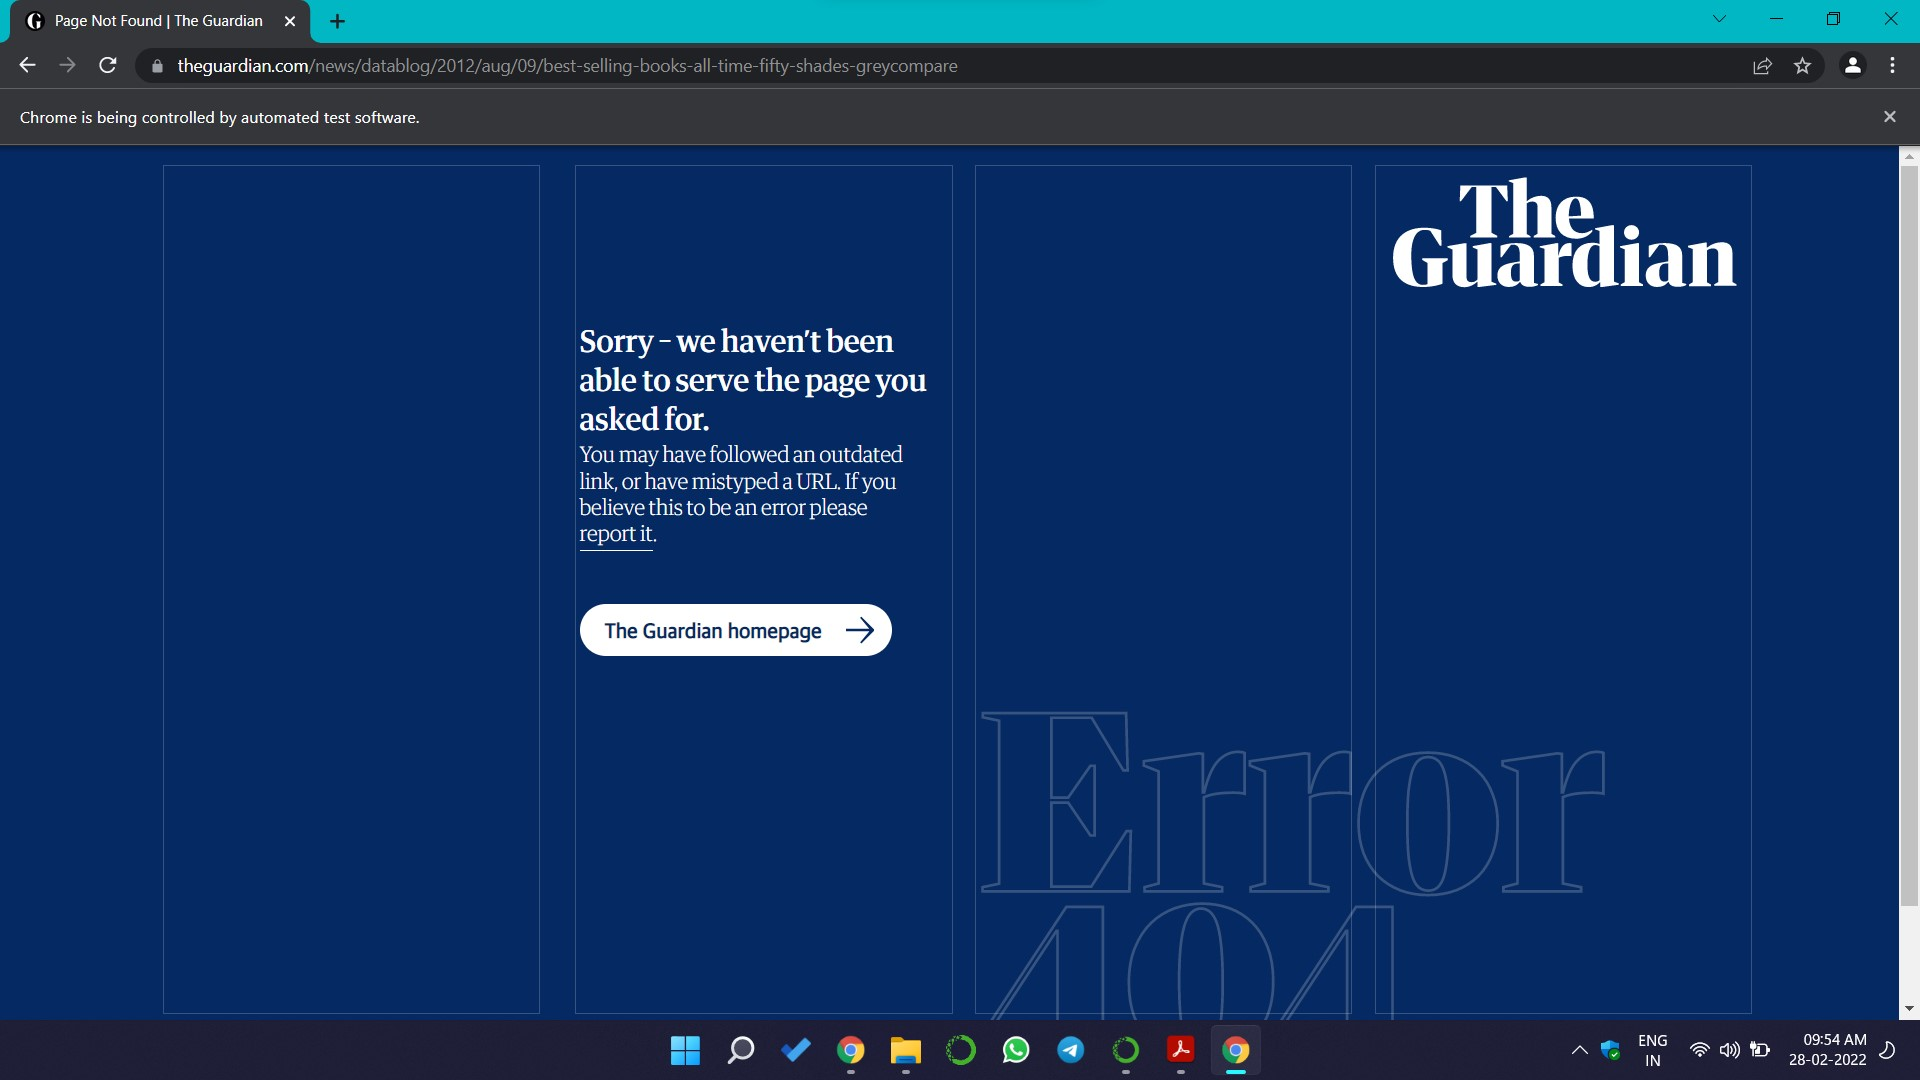

#empty lists
Book_name=[]
Author_name=[]
Volumes=[]
Publisher=[]
Genre=[]

#extracting the name of book
try:
    tag = driver.find_elements_by_xpath()
    for i in tag:
        Book_name.append(i.text)
except NoSuchElementException:
    Book_name.append(' ')
    
#author name
try:
    tag = driver.find_elements_by_xpath()
    for i in tag:
        Author_name.append(i.text)
except NoSuchElementException:
    Author_name.append(' ')
    
#volumes of book
try:
    tag = driver.find_elements_by_xpath()
    for i in tag:
        Volumes.append(i.text)
except NoSuchElementException:
    Volumes.append(' ')
    
#publisher name
try:
    tag = driver.find_elements_by_xpath()
    for i in tag:
        Publisher.append(i.text)
except NoSuchElementException:
    Publisher.append(' ')
    
#genre
try:
    tag = driver.find_elements_by_xpath()
    for i in tag:
        Genre.append(i.text)
except NoSuchElementException:
    Genre.append(' ')
    
print(len(Book_name),len(Author_name),len(Volumes),len(Publisher),len(Genre))

## 9. Scrape the details most watched tv series of all time from imdb.com.
### Url = https://www.imdb.com/list/ls095964455/
You have to find the following details:
A) Name
B) Year span
C) Genre
D) Run time
E) Ratings
F) Votes

In [19]:
# connecting to the driver:
driver = webdriver.Chrome("chromedriver.exe")
driver.maximize_window()

In [20]:
# getting to webpage:
url = 'https://www.imdb.com/list/ls095964455/'
driver.get(url)

In [21]:
#creating empty lists
Name=[]
Year_span=[]
Genre=[]
Run_time=[]
Rating=[]
Votes=[]

#extracting name of series
try:
    tag = driver.find_elements_by_xpath('/html/body/div[3]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div/div[2]/h3/a')
    for i in tag:
        Name.append(i.text)
except NoSuchElementException: 
    Name.append(' ')
    
#year span of series
try:
    tag = driver.find_elements_by_xpath('/html/body/div[3]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div/div[2]/h3/span[2]')
    for i in tag:
        Year_span.append(i.text)
except NoSuchElementException: 
    Year_span.append(' ')
    
#genre of series
try:
    tag = driver.find_elements_by_xpath('/html/body/div[3]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div/div[2]/p[1]/span[5]')
    for i in tag:
        Genre.append(i.text)
except NoSuchElementException: 
    Genre.append(' ')
    
#total run time
try:
    tag = driver.find_elements_by_xpath('/html/body/div[3]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div/div[2]/p[1]/span[3]')
    for i in tag:
        Run_time.append(i.text)
except NoSuchElementException: 
    Run_time.append(' ') 
    
 #Rating of series
try:
    tag = driver.find_elements_by_xpath('/html/body/div[3]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div/div[2]/div[1]/div[1]/span[2]')
    for i in tag:
        Rating.append(i.text)
except NoSuchElementException: 
    Rating.append(' ') 
    
#votes obtained
try:
    tag = driver.find_elements_by_xpath('/html/body/div[3]/div/div[2]/div[3]/div[1]/div/div[3]/div[3]/div/div[2]/p[4]/span[2]')
    for i in tag:
        Votes.append(i.text)
except NoSuchElementException: 
    Votes.append(' ')
    
print(len(Name),len(Year_span),len(Genre),len(Run_time),len(Rating),len(Votes))

100 100 100 100 100 100


In [22]:
#converting into dataframe
df=pd.DataFrame({'Name':Name,
                 'Year of Span': Year_span,
                 'Genre': Genre,
                 'Run time': Run_time,
                 'Rating':Rating,
                 'Votes':Votes})
df

,Name,Year of Span,Genre,Run time,Rating,Votes
0,Game of Thrones,(2011–2019),"Action, Adventure, Drama",57 min,9.2,"1,957,387"
1,Stranger Things,(2016– ),"Drama, Fantasy, Horror",51 min,8.7,"967,014"
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",44 min,8.1,"932,382"
3,13 Reasons Why,(2017–2020),"Drama, Mystery, Thriller",60 min,7.5,"279,140"
4,The 100,(2014–2020),"Drama, Mystery, Sci-Fi",43 min,7.6,"239,318"
...,...,...,...,...,...,...
95,Reign,(2013–2017),"Drama, Fantasy",42 min,7.5,"47,825"
96,A Series of Unfortunate Events,(2017–2019),"Adventure, Comedy, Drama",50 min,7.8,"58,547"
97,Criminal Minds,(2005–2020),"Crime, Drama, Mystery",42 min,8.1,"185,890"
98,Scream: The TV Series,(2015–2019),"Comedy, Crime, Drama",45 min,7.1,"39,359"


## 10. Details of Datasets from UCI machine learning repositories.
### Url = https://archive.ics.uci.edu/
You have to find the following details:
A) Dataset name
B) Data type
C) Task
D) Attribute type
E) No of instances
F) No of attribute
G) Year


Note: - from the home page you have to go to the ShowAllDataset page through code.

In [23]:
# connecting to the driver:
driver = webdriver.Chrome("chromedriver.exe")
driver.maximize_window()

In [24]:
# getting to webpage:
url = 'https://archive.ics.uci.edu/'
driver.get(url)

In [25]:
# to the ShowAllDataset page 
all_dataset = driver.find_element_by_xpath('/html/body/table[1]/tbody/tr/td[2]/span[2]')
all_dataset.click()

In [26]:
# creating Empty lists
Dataset_name=[]
Data_type=[]
Task=[]
Attribute_type=[]
instance=[]
attribute=[]
Year=[]

# Extracting the required

# Dataset name
try:
    tag=driver.find_elements_by_xpath('/html/body/table[2]/tbody/tr/td[2]/table[2]/tbody/tr/td[1]/table/tbody/tr/td[2]/p/b/a')
    for i in tag:
        Dataset_name.append(i.text)
except NoSuchElementException: 
    Dataset_name.append(' ')
print(len(Dataset_name))

# Data_type
try:
    tag=driver.find_elements_by_xpath('/html/body/table[2]/tbody/tr/td[2]/table[2]/tbody/tr/td[2]/p')
    for i in tag:
        Data_type.append(i.text)
except NoSuchElementException: 
    Data_type.append(' ')
print(len(Data_type))
    
# Task
try:
    tag=driver.find_elements_by_xpath('/html/body/table[2]/tbody/tr/td[2]/table[2]/tbody/tr/td[3]/p')
    for i in tag:
        Task.append(i.text)
except NoSuchElementException: 
    Task.append(' ')
print(len(Task))
    
# Attribute_type
try:
    tag=driver.find_elements_by_xpath('/html/body/table[2]/tbody/tr/td[2]/table[2]/tbody/tr/td[4]/p')
    for i in tag:
        Attribute_type.append(i.text)
except NoSuchElementException: 
    Attribute_type.append(' ')
print(len(Attribute_type))

# instance
try:
    tag=driver.find_elements_by_xpath('/html/body/table[2]/tbody/tr/td[2]/table[2]/tbody/tr/td[5]/p')
    for i in tag:
        instance.append(i.text)
except NoSuchElementException: 
    instance.append(' ')
print(len(instance))

# attribute
try:
    tag=driver.find_elements_by_xpath('/html/body/table[2]/tbody/tr/td[2]/table[2]/tbody/tr/td[6]/p')
    for i in tag:
        attribute.append(i.text)
except NoSuchElementException: 
    attribute.append(' ')
print(len(attribute))

# Year
try:
    tag=driver.find_elements_by_xpath('/html/body/table[2]/tbody/tr/td[2]/table[2]/tbody/tr/td[7]/p')
    for i in tag:
        Year.append(i.text)
except NoSuchElementException: 
    Year.append(' ')
print(len(Year))

622
623
623
623
623
623
623


In [27]:
#converting into dataframe
df = pd.DataFrame({'Dataset_name':Dataset_name,
                   'Data_type':Data_type[1:],
                   'Task':Task[1:],
                   'Attribute_type':Attribute_type[1:],
                   'instance':instance[1:],
                   'attribute':attribute[1:],
                   'Year':Year[1:]})
df

,Dataset_name,Data_type,Task,Attribute_type,instance,attribute,Year
0,Abalone,Multivariate,Classification,"Categorical, Integer, Real",4177,8,1995
1,Adult,Multivariate,Classification,"Categorical, Integer",48842,14,1996
2,Annealing,Multivariate,Classification,"Categorical, Integer, Real",798,38,
3,Anonymous Microsoft Web Data,,Recommender-Systems,Categorical,37711,294,1998
4,Arrhythmia,Multivariate,Classification,"Categorical, Integer, Real",452,279,1998
...,...,...,...,...,...,...,...
617,Influenza outbreak event prediction via Twitte...,Multivariate,Classification,"Integer, Real",75840,525,2020
618,Turkish Music Emotion Dataset,Multivariate,Classification,"Integer, Real",400,50,2020
619,Maternal Health Risk Data Set,,Classification,,1014,7,2020
620,Room Occupancy Estimation,"Multivariate, Time-Series",Classification,Real,10129,16,2021
